In [169]:
# Import all modules and libraries
import pandas as pd 
import numpy as np 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [170]:
#import initial data
med = pd.read_csv ("C:/Users/blien/Documents/WGU/D212/Task2/medical_clean.csv")

In [171]:
#define features for analysis
features = med.select_dtypes(include=['number']).columns.tolist()
features.remove('CaseOrder') 
features.remove('Zip') 
features.remove('Item1') 
features.remove('Item2') 
features.remove('Item3')
features.remove('Item4') 
features.remove('Item5') 
features.remove('Item6')
features.remove('Item7') 
features.remove('Item8') 
features

['Lat',
 'Lng',
 'Population',
 'Children',
 'Age',
 'Income',
 'VitD_levels',
 'Doc_visits',
 'Full_meals_eaten',
 'vitD_supp',
 'Initial_days',
 'TotalCharge',
 'Additional_charges']

In [172]:
med_final = pd.DataFrame(med,columns=features)

In [173]:
med_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Lat                 10000 non-null  float64
 1   Lng                 10000 non-null  float64
 2   Population          10000 non-null  int64  
 3   Children            10000 non-null  int64  
 4   Age                 10000 non-null  int64  
 5   Income              10000 non-null  float64
 6   VitD_levels         10000 non-null  float64
 7   Doc_visits          10000 non-null  int64  
 8   Full_meals_eaten    10000 non-null  int64  
 9   vitD_supp           10000 non-null  int64  
 10  Initial_days        10000 non-null  float64
 11  TotalCharge         10000 non-null  float64
 12  Additional_charges  10000 non-null  float64
dtypes: float64(7), int64(6)
memory usage: 1015.7 KB


In [174]:
#scale dataset
scaler = StandardScaler()
scaler.fit(med_final)
scaled_med = pd.DataFrame(scaler.transform(med_final), columns = features)

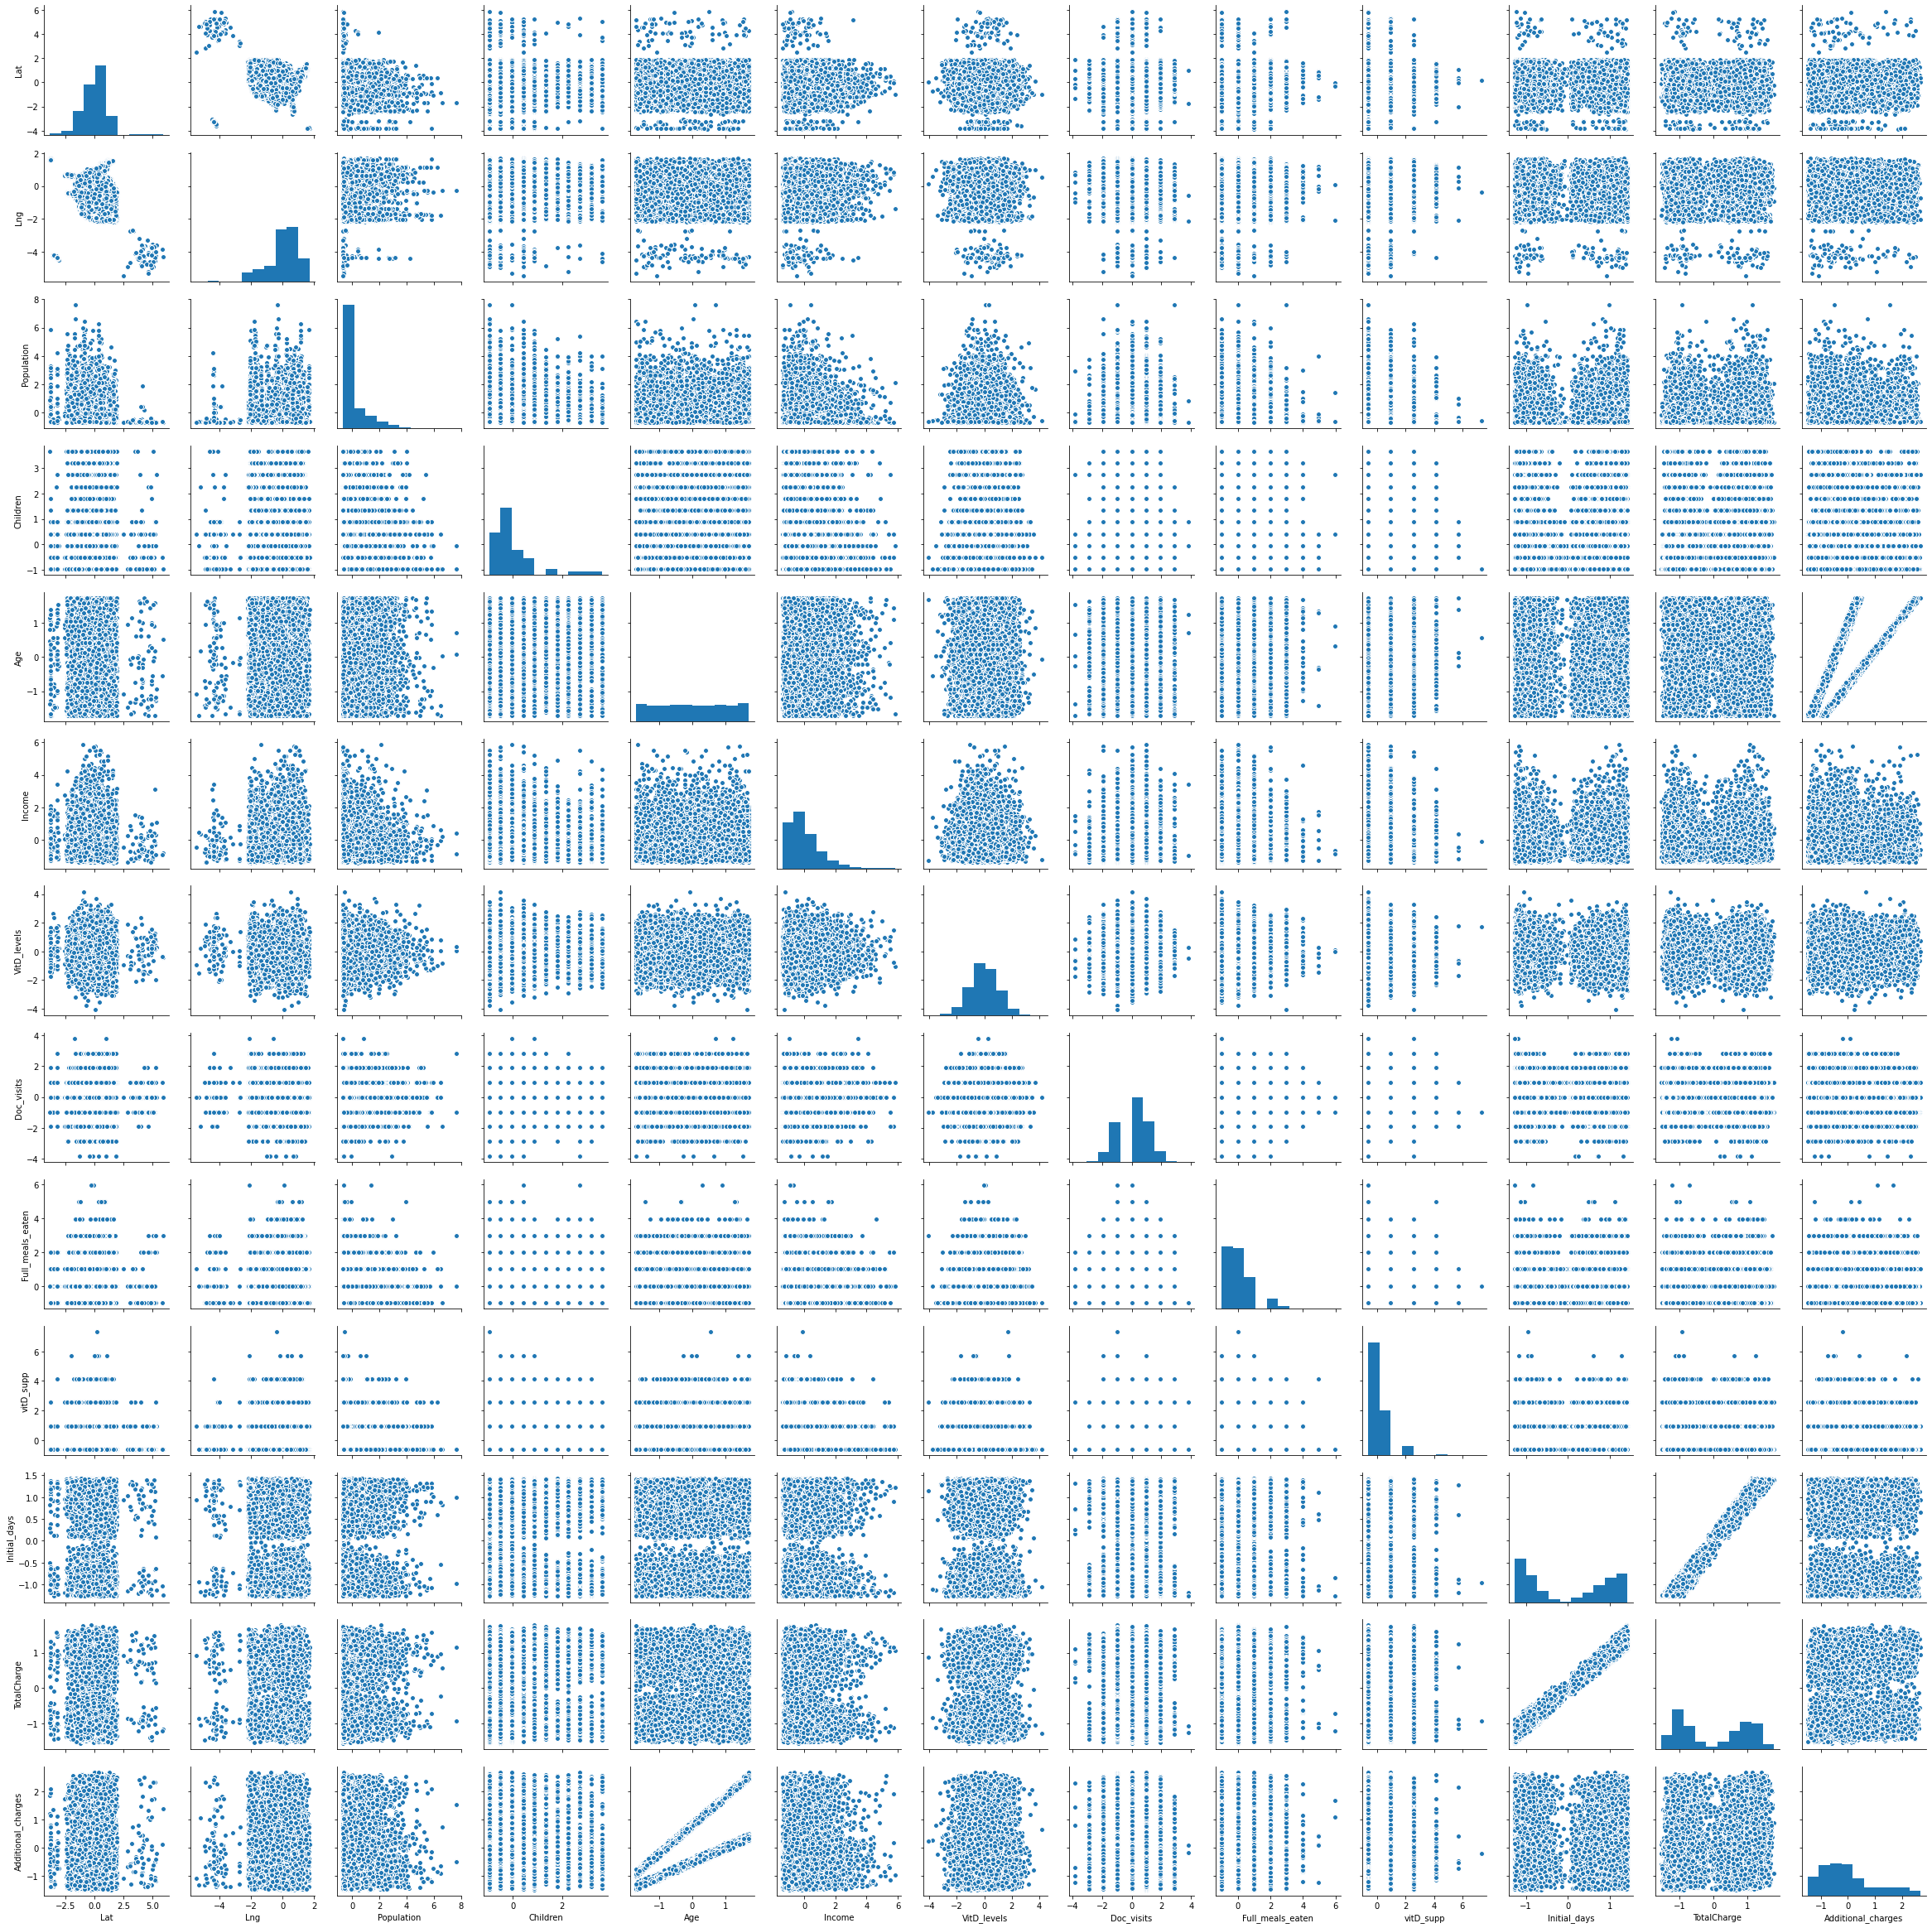

In [175]:
# create data visualizations
ak = sns.pairplot(scaled_med)
plt.show()

In [176]:
#remove correlated features
scaled_final = scaled_med.drop(columns = ['Initial_days', 'Additional_charges'])

In [177]:
#export clean data to CSV file
scaled_final.to_csv('C:/Users/blien/Documents/WGU/D212/Task2/medical_data_output.csv')

In [178]:
#calculating PCA
pca = PCA(n_components = 11)
print(pca.fit_transform(scaled_final))

[[ 0.51694758 -0.99533423  0.72526565 ... -1.06516584  0.45973311
  -0.75248984]
 [ 1.07067071 -0.31602615 -0.71949634 ...  0.54430457 -0.1798712
  -0.677025  ]
 [-0.63191686 -0.34822683 -0.34351098 ... -0.51388679 -1.45131866
   0.77474273]
 ...
 [ 0.01012638  0.07785102 -0.30138835 ...  0.56382785  1.52587919
  -0.42531374]
 [-1.34468874  1.2780065  -0.63304016 ...  0.94225872  0.78031986
  -0.00519806]
 [ 1.51026813  2.53141163  0.04050816 ...  0.06471284 -0.72448788
   1.78508238]]


In [179]:
#Percent variance ratio
print(pca.explained_variance_ratio_.cumsum() *100)

[ 11.1757367   20.73555845  30.22626519  39.63602097  48.85584806
  57.97254455  66.88493758  75.74882239  84.51398976  93.2202649
 100.        ]


In [180]:
print('Variance by 11 principal components =', 
      sum(pca.explained_variance_ratio_*100).round(2))

Variance by 11 principal components = 100.0


In [181]:
# captured variance per PC
explainVAR2 = pca.explained_variance_ratio_*100
VAR_PC2 = pd.DataFrame(explainVAR2.round(2), 
            columns=['Captured variance per PC'], index = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6', 'PC7', 'PC8', 'PC9','PC10','PC11'])
VAR_PC2

,Captured variance per PC
PC1,11.18
PC2,9.56
PC3,9.49
PC4,9.41
PC5,9.22
PC6,9.12
PC7,8.91
PC8,8.86
PC9,8.77
PC10,8.71


In [182]:
#load components
loadings = pd.DataFrame(pca.components_.T, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6', 'PC7', 'PC8', 'PC9','PC10','PC11'], index = scaled_final.columns)

In [183]:
labels = (['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6', 'PC7', 'PC8', 'PC9','PC10','PC11'])

In [184]:
#Extract the eigenvalues
cov_matrix = np.dot(scaled_final.T, scaled_final)/ scaled_final.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

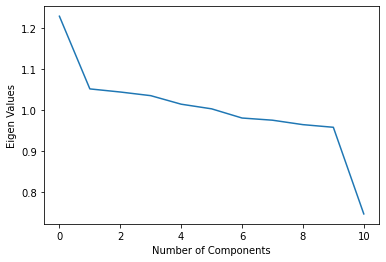

In [185]:
#plot the eigenvalues
plt.plot(eigenvalues)
plt.xlabel('Number of Components')
plt.ylabel('Eigen Values')
plt.show()

Text(0.5, 1.0, 'Principal Component Matrix')

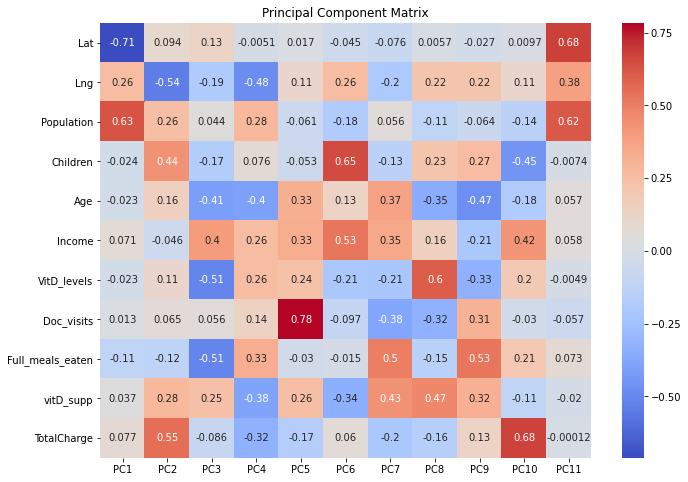

In [186]:
# heatmap of PCs and loadings
plt.figure(figsize=(11,8))
sns.heatmap(loadings,cmap='coolwarm',
           annot=True,fmt='.2g')
plt.title('Principal Component Matrix')

In [187]:
#reduce features
scaled_final2 = scaled_final.drop(columns = ['Doc_visits','TotalCharge'])

In [188]:
scaled_final2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Lat               10000 non-null  float64
 1   Lng               10000 non-null  float64
 2   Population        10000 non-null  float64
 3   Children          10000 non-null  float64
 4   Age               10000 non-null  float64
 5   Income            10000 non-null  float64
 6   VitD_levels       10000 non-null  float64
 7   Full_meals_eaten  10000 non-null  float64
 8   vitD_supp         10000 non-null  float64
dtypes: float64(9)
memory usage: 703.2 KB


In [189]:
#calculating PCA
pca_final = PCA(n_components = 7)
print(pca_final.fit_transform(scaled_final2))

[[ 0.57736804  0.44665848 -0.42316519 ...  0.92324732  0.81518492
  -0.94883847]
 [ 1.12528752 -0.68765639  0.20809851 ...  0.21281411  0.778559
  -0.2730099 ]
 [-0.52707016 -0.2762481   0.63597972 ... -0.36156679 -1.02536006
   0.23963984]
 ...
 [-0.06668728 -0.22853663  0.05368703 ...  1.09549518  0.46638951
   0.33714668]
 [-1.43839328 -0.37634083  0.9071435  ... -0.54600597  0.44006143
  -0.64216604]
 [ 1.38413625  0.50155229  0.99940202 ...  1.96381311 -0.88840577
  -0.65467066]]


In [190]:
#load components
loadings = pd.DataFrame(pca_final.components_.T, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6', 'PC7'], index = scaled_final2.columns)

In [191]:
print('Variance by 7 principal components =', 
      sum(pca_final.explained_variance_ratio_*100).round(2))

Variance by 7 principal components = 80.96


In [192]:
# captured variance per PC
explainVAR2 = pca_final.explained_variance_ratio_*100
VAR_PC2 = pd.DataFrame(explainVAR2.round(2), 
            columns=['Captured variance per PC'], index = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6', 'PC7'])
VAR_PC2

,Captured variance per PC
PC1,13.64
PC2,11.60
PC3,11.55
PC4,11.26
PC5,11.14
PC6,10.91
PC7,10.85


In [193]:
#Percent variance ratio
print(pca_final.explained_variance_ratio_.cumsum() *100)

[13.64405753 25.24411175 36.79052486 48.05540602 59.20000284 70.10879747
 80.96198037]


In [194]:
#labels for graph
labels2 = (['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6', 'PC7'])

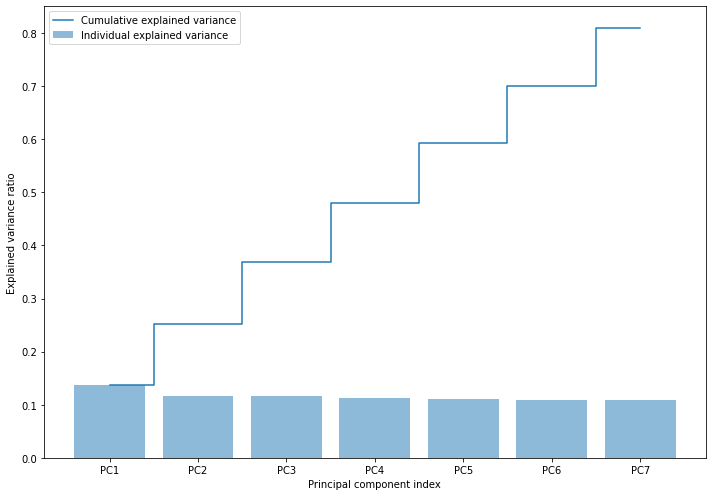

In [195]:
#explained variance graph
exp_var_pca = pca_final.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
fig, ax1 = plt.subplots()
fig.set_size_inches(10,7)
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center',
        tick_label=labels2, label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()